In [1]:
import pandas as pd
from fbprophet import Prophet

In [2]:
PATH = "../Data/airline_passengers.csv"

df = pd.read_csv(PATH)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Month                    144 non-null    object
 1   Thousands of Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [4]:
df.columns = ['ds', 'y']
df['ds'] = pd.to_datetime(df['ds'])

In [5]:
df.head()

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


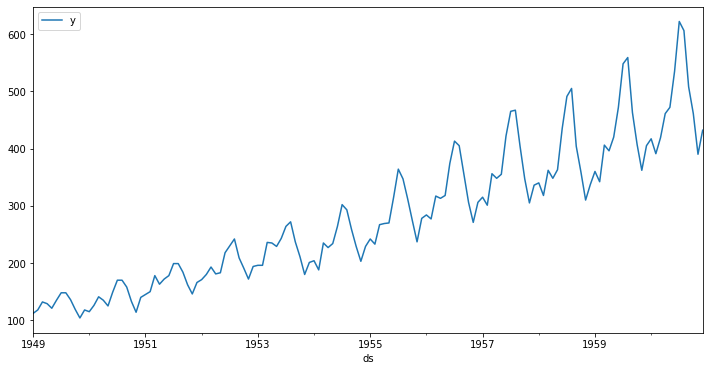

In [6]:
df.plot(x='ds', y='y', figsize=(12, 6))

In [7]:
m = Prophet()
m.fit(df)

future = m.make_future_dataframe(periods=50, freq='MS')
forecast = m.predict(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


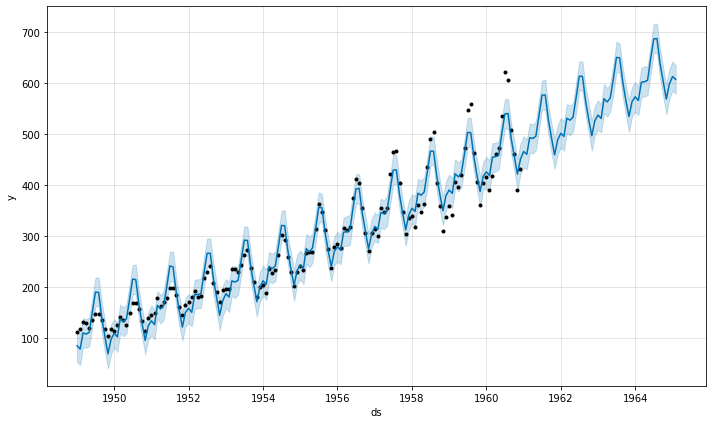

In [8]:
fig = m.plot(forecast)

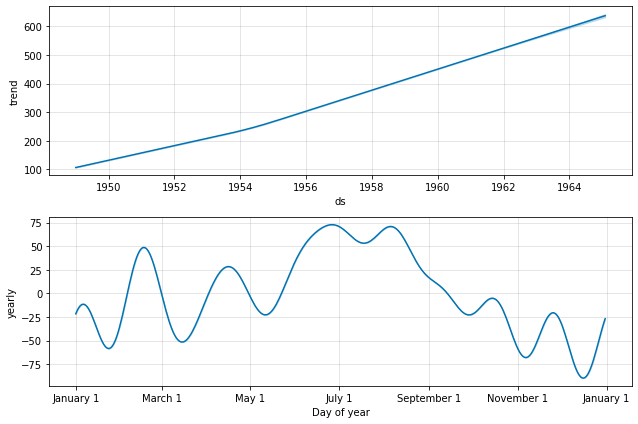

In [9]:
fig = m.plot_components(forecast)

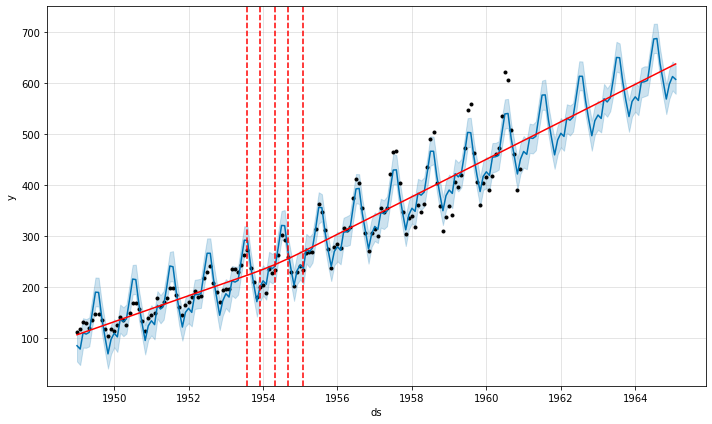

In [10]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [11]:
m = Prophet(seasonality_mode='multiplicative')
m.fit(df)

future = m.make_future_dataframe(periods=50, freq='MS')
forecast = m.predict(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


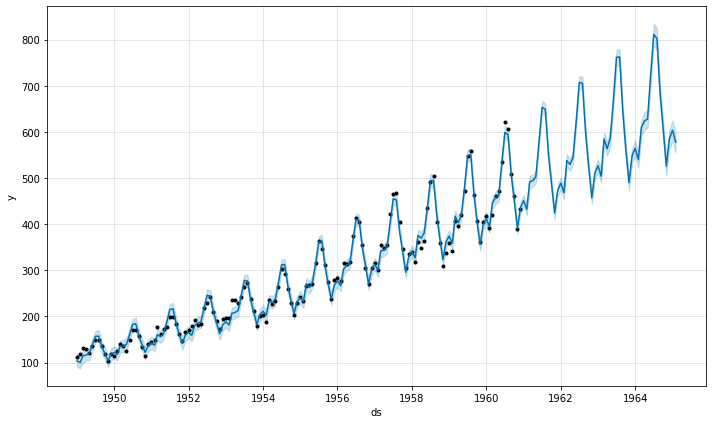

In [12]:
fig = m.plot(forecast)

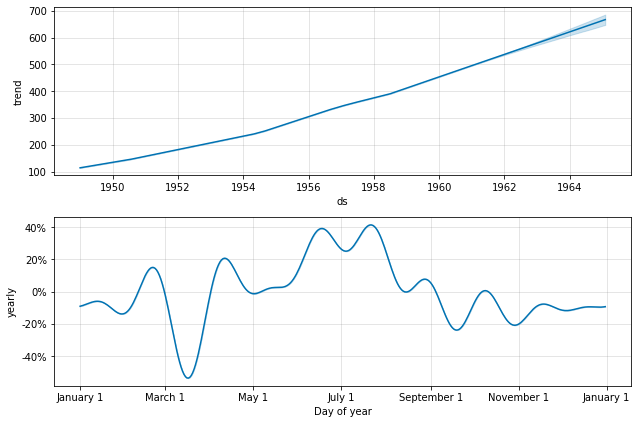

In [13]:
fig = m.plot_components(forecast)